In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlalchemy
sqlalchemy.__version__
import sys
sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

In [292]:
import pandas as pd
import numpy as np
SAMPLEDATA=pd.read_csv(filepath_or_buffer="G:/IVY/data/MACHINE_LEARNING/stock.csv", 
                              sep=',', encoding='latin-1')
print(type(SAMPLEDATA))
pd.set_option

pd.options.display.max_columns=50
pd.options.display.max_rows=100
print('Shape before deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA=SAMPLEDATA.drop_duplicates()
print('Shape After deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA.head(10)

<class 'pandas.core.frame.DataFrame'>
Shape before deleting duplicate values: (492, 18)
Shape After deleting duplicate values: (492, 18)


SI              Name  G Factor  Altman Z Scr  Enterprise Value  \
0   1  Reliance Industr         3          3.33        2248246.66   
1   2               TCS         2         19.53        1381204.23   
2   3         HDFC Bank         5          1.45        3156610.92   
3   4     Bharti Airtel         3          3.85        1051717.05   
4   5        ICICI Bank         6          1.17        2041092.70   
5   6    St Bk of India         7          0.59        6028528.12   
6   7    Life Insurance         5          0.44         632966.58   
7   8           Infosys         5         10.54         611748.69   
8   9    Hind. Unilever         4         14.24         576564.89   
9  10               ITC         6         12.62         531364.52   

   Graham Price  Intrinsic Value      Sales        Debt      Assets  \
0       1647.85          1049.69  901064.00   346142.00  1755986.00   
1        845.00          1525.58  240893.00     8021.00   145472.00   
2        992.07          1030.67  283649.02  2139211.91  2530432.44   
3        207.58           226.82  149982.40   215592.30   444531.00   
4        659.99           720.16  159515.92  1399893.96  1958490.50   
5        886.76           585.08  439188.51  5606146.99  6733755.60   
6        436.37           975.72  846656.19        8.67  5316047.12   
7        549.42           995.81  153670.00     8359.00   136020.00   
8        463.17           980.60   61896.00     1484.00    78489.00   
9        148.34           182.75   70881.00      303.43    91826.16   

   Working Capital  Book Value  Capital Employed  Piotski Scrore  Leverage  \
0        178748.00     1172.80        1297588.00               6      2.12   
1         36904.00      250.10          58072.00               7      1.59   
2        240255.06      518.73         248686.41               4      8.74   
3        -49689.10      145.04         270518.10               5      5.42   
4        117837.81      307.18         128908.15               6      9.13   
5        475932.03      464.94         522046.17               8     15.29   
6        133304.33      130.83         137379.10               6     59.79   
7         39682.00      212.28          67597.00               6      1.48   
8          4268.00      217.99          59037.00               8      1.48   
9         27446.20       59.68          58127.20               5      1.19   

    Reserves    EPS       CMP  
0  786715.00  102.90  2955.10  
1   90127.00  126.88  3832.05  
2  288879.53   84.33  1596.90  
3   79142.20   13.20  1427.40  
4  213101.01   63.02  1105.65  
5  414046.71   75.17   839.20  
6   76421.87   64.69  1066.85  
7   86045.00   63.20  1488.90  
8   50983.00   43.74  2479.75  
9   73258.53   16.39   431.15

# Defining the problem statement: 
* Target Variable: Graham Price
* Predictors: Intrinsic Value, Book Value, EPS, CMP


# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.
* Qualitative Column-Name 
* Continious Column-Enterprise Value,Graham Price(Target Variable),Sales,Debt,Assets,Liverage,Book Value,Working Capital,Reserves,EPS,CMP,PitroskiScore
* Categoriacal Column-G Factor, Altman Z Score

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine

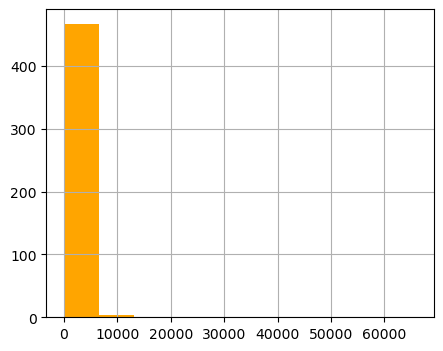

In [293]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
SAMPLEDATA['Graham Price'].hist(figsize=(5,4),color='Orange',bins=10)
plt.show()

# Basic Data Exploration

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [295]:
SAMPLEDATA.describe(include='all')

SI              Name   G Factor  Altman Z Scr  \
count   492.000000               492  492.00000    492.000000   
unique         NaN               492        NaN           NaN   
top            NaN  Reliance Industr        NaN           NaN   
freq           NaN                 1        NaN           NaN   
mean    249.601626               NaN    4.04878      9.525488   
std     145.115769               NaN    1.46988      8.130797   
min       1.000000               NaN    0.00000     -0.100000   
25%     123.750000               NaN    3.00000      3.587500   
50%     249.500000               NaN    4.00000      7.305000   
75%     376.250000               NaN    5.00000     13.392500   
max     500.000000               NaN    9.00000     52.290000   

        Enterprise Value  Graham Price  Intrinsic Value          Sales  \
count       4.920000e+02    472.000000       471.000000     492.000000   
unique               NaN           NaN              NaN            NaN   
top                  NaN           NaN              NaN            NaN   
freq                 NaN           NaN              NaN            NaN   
mean        1.335592e+05    746.228919       966.898323   29774.713618   
std         3.822517e+05   3174.557799      3124.635442   87308.658312   
min         9.940740e+03      3.350000         4.470000       5.340000   
25%         1.836919e+04    150.140000       167.495000    3159.480000   
50%         3.508217e+04    299.955000       409.430000    7056.845000   
75%         1.006242e+05    673.110000       955.040000   18558.720000   
max         6.028528e+06  65943.020000     62008.360000  901064.000000   

                Debt        Assets  Working Capital    Book Value  \
count   4.920000e+02  4.920000e+02       492.000000    492.000000   
unique           NaN           NaN              NaN           NaN   
top              NaN           NaN              NaN           NaN   
freq             NaN           NaN              NaN           NaN   
mean    5.856196e+04  1.042766e+05      8302.077195    404.753171   
std     3.156252e+05  4.526983e+05     36394.494435   1858.173710   
min     0.000000e+00  6.124700e+02   -105940.610000    -98.490000   
25%     1.606400e+02  4.357300e+03       703.080000     80.145000   
50%     1.191750e+03  1.154880e+04      1947.380000    161.515000   
75%     8.022083e+03  3.922936e+04      4496.650000    333.977500   
max     5.606147e+06  6.733756e+06    475932.030000  39383.630000   

        Capital Employed  Piotski Scrore    Leverage       Reserves  \
count       4.920000e+02      492.000000  492.000000     492.000000   
unique               NaN             NaN         NaN            NaN   
top                  NaN             NaN         NaN            NaN   
freq                 NaN             NaN         NaN            NaN   
mean        2.309586e+04        6.146341    3.115102   17388.940407   
std         7.859453e+04        1.659057    4.773860   50984.122393   
min        -1.002652e+05        1.000000  -21.390000 -154286.600000   
25%         2.144483e+03        5.000000    1.310000    2043.140000   
50%         4.696405e+03        6.000000    1.720000    4858.730000   
75%         1.379034e+04        7.000000    2.987500   12583.862500   
max         1.297588e+06        9.000000   59.790000  786715.000000   

               EPS             CMP  
count    492.000000     492.000000  
unique          NaN            NaN  
top             NaN            NaN  
freq            NaN            NaN  
mean      61.630955    2570.897967  
std      237.019192    7292.217742  
min      -74.940000      16.730000  
25%        9.872500     433.962500  
50%       23.515000    1013.500000  
75%       57.590000    2241.812500  
max     4907.260000  125580.700000

In [296]:
print("No of null Values per Column :- ")
print(SAMPLEDATA.isnull().sum())
print("***************************************************************")
print("No of Unique Values per Column :- ")
SAMPLEDATA.nunique()

No of null Values per Column :- 
SI                   0
Name                 0
G Factor             0
Altman Z Scr         0
Enterprise Value     0
Graham Price        20
Intrinsic Value     21
Sales                0
Debt                 0
Assets               0
Working Capital      0
Book Value           0
Capital Employed     0
Piotski Scrore       0
Leverage             0
Reserves             0
EPS                  0
CMP                  0
dtype: int64
***************************************************************
No of Unique Values per Column :- 


SI                  492
Name                492
G Factor             10
Altman Z Scr        431
Enterprise Value    492
Graham Price        470
Intrinsic Value     471
Sales               492
Debt                481
Assets              492
Working Capital     492
Book Value          490
Capital Employed    492
Piotski Scrore        9
Leverage            267
Reserves            492
EPS                 484
CMP                 490
dtype: int64

# Removing useless columns from the data

In [297]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['SI']
SAMPLEDATA = SAMPLEDATA.drop(UselessColumns,axis=1)
SAMPLEDATA.head(10)

Name  G Factor  Altman Z Scr  Enterprise Value  Graham Price  \
0  Reliance Industr         3          3.33        2248246.66       1647.85   
1               TCS         2         19.53        1381204.23        845.00   
2         HDFC Bank         5          1.45        3156610.92        992.07   
3     Bharti Airtel         3          3.85        1051717.05        207.58   
4        ICICI Bank         6          1.17        2041092.70        659.99   
5    St Bk of India         7          0.59        6028528.12        886.76   
6    Life Insurance         5          0.44         632966.58        436.37   
7           Infosys         5         10.54         611748.69        549.42   
8    Hind. Unilever         4         14.24         576564.89        463.17   
9               ITC         6         12.62         531364.52        148.34   

   Intrinsic Value      Sales        Debt      Assets  Working Capital  \
0          1049.69  901064.00   346142.00  1755986.00        178748.00   
1          1525.58  240893.00     8021.00   145472.00         36904.00   
2          1030.67  283649.02  2139211.91  2530432.44        240255.06   
3           226.82  149982.40   215592.30   444531.00        -49689.10   
4           720.16  159515.92  1399893.96  1958490.50        117837.81   
5           585.08  439188.51  5606146.99  6733755.60        475932.03   
6           975.72  846656.19        8.67  5316047.12        133304.33   
7           995.81  153670.00     8359.00   136020.00         39682.00   
8           980.60   61896.00     1484.00    78489.00          4268.00   
9           182.75   70881.00      303.43    91826.16         27446.20   

   Book Value  Capital Employed  Piotski Scrore  Leverage   Reserves    EPS   \
0     1172.80        1297588.00               6      2.12  786715.00  102.90   
1      250.10          58072.00               7      1.59   90127.00  126.88   
2      518.73         248686.41               4      8.74  288879.53   84.33   
3      145.04         270518.10               5      5.42   79142.20   13.20   
4      307.18         128908.15               6      9.13  213101.01   63.02   
5      464.94         522046.17               8     15.29  414046.71   75.17   
6      130.83         137379.10               6     59.79   76421.87   64.69   
7      212.28          67597.00               6      1.48   86045.00   63.20   
8      217.99          59037.00               8      1.48   50983.00   43.74   
9       59.68          58127.20               5      1.19   73258.53   16.39   

       CMP  
0  2955.10  
1  3832.05  
2  1596.90  
3  1427.40  
4  1105.65  
5   839.20  
6  1066.85  
7  1488.90  
8  2479.75  
9   431.15

In [233]:
SAMPLEinfo=SAMPLEDATA.info()
SAMPLEDATA.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              492 non-null    object 
 1   G Factor          492 non-null    int64  
 2   Altman Z Scr      492 non-null    float64
 3   Enterprise Value  492 non-null    float64
 4   Graham Price      472 non-null    float64
 5   Intrinsic Value   471 non-null    float64
 6   Sales             492 non-null    float64
 7   Debt              492 non-null    float64
 8   Assets            492 non-null    float64
 9   Working Capital   492 non-null    float64
 10  Book Value        492 non-null    float64
 11  Capital Employed  492 non-null    float64
 12  Piotski Scrore    492 non-null    int64  
 13  Leverage          492 non-null    float64
 14  Reserves          492 non-null    float64
 15  EPS               492 non-null    float64
 16  CMP               492 non-null    float64
dt

Index(['Name', 'G Factor', 'Altman Z Scr', 'Enterprise Value', 'Graham Price',
       'Intrinsic Value', 'Sales', 'Debt', 'Assets', 'Working Capital',
       'Book Value', 'Capital Employed', 'Piotski Scrore', 'Leverage',
       'Reserves', 'EPS ', 'CMP'],
      dtype='object')

# missing value treatment

In [299]:
SAMPLEDATA['Intrinsic Value'].fillna(value=SAMPLEDATA['Intrinsic Value'].median(), inplace=True) # Continious variable

In [300]:
SAMPLEDATA['Graham Price'].fillna(value=SAMPLEDATA['Graham Price'].median(), inplace=True) # Continious variable

In [301]:
print(SAMPLEDATA.isnull().sum())

Name                0
G Factor            0
Altman Z Scr        0
Enterprise Value    0
Graham Price        0
Intrinsic Value     0
Sales               0
Debt                0
Assets              0
Working Capital     0
Book Value          0
Capital Employed    0
Piotski Scrore      0
Leverage            0
Reserves            0
EPS                 0
CMP                 0
dtype: int64


# Feature Enginearing
* Ratio Calculations : P/B Ratio, P/E Ratio, Debt/Asset Ratio

In [302]:
SAMPLEDATA['P/B Ratio']=SAMPLEDATA['CMP']/SAMPLEDATA['Book Value']
SAMPLEDATA['P/E Ratio']=SAMPLEDATA['CMP']/SAMPLEDATA['EPS ']
SAMPLEDATA['Debt/Asset Ratio']=SAMPLEDATA['Debt']/SAMPLEDATA['Assets']
SAMPLEDATA


Name  G Factor  Altman Z Scr  Enterprise Value  Graham Price  \
0    Reliance Industr         3          3.33        2248246.66       1647.85   
1                 TCS         2         19.53        1381204.23        845.00   
2           HDFC Bank         5          1.45        3156610.92        992.07   
3       Bharti Airtel         3          3.85        1051717.05        207.58   
4          ICICI Bank         6          1.17        2041092.70        659.99   
..                ...       ...           ...               ...           ...   
487      Alkyl Amines         2         13.06          10296.52        403.00   
488              CEAT         4          3.69          12034.86       1890.12   
489           Redtape         5         13.00          10742.62        116.03   
490   Electrost.Cast.         4          4.29          12165.53        155.16   
491      Safari Inds.         5         17.95          10096.61        370.09   

     Intrinsic Value      Sales        Debt      Assets  Working Capital  \
0            1049.69  901064.00   346142.00  1755986.00        178748.00   
1            1525.58  240893.00     8021.00   145472.00         36904.00   
2            1030.67  283649.02  2139211.91  2530432.44        240255.06   
3             226.82  149982.40   215592.30   444531.00        -49689.10   
4             720.16  159515.92  1399893.96  1958490.50        117837.81   
..               ...        ...         ...         ...              ...   
487           903.18    1440.61        3.17     1584.04           217.11   
488          2100.67   11943.48     1791.50     9994.50          -861.21   
489           331.20    1842.92      480.06     1588.37           460.06   
490           241.18    7478.01     2332.14     9108.26          3535.48   
491           759.90    1550.42      146.26     1144.22           650.20   

     Book Value  Capital Employed  Piotski Scrore  Leverage   Reserves  \
0       1172.80        1297588.00               6      2.12  786715.00   
1        250.10          58072.00               7      1.59   90127.00   
2        518.73         248686.41               4      8.74  288879.53   
3        145.04         270518.10               5      5.42   79142.20   
4        307.18         128908.15               6      9.13  213101.01   
..          ...               ...             ...       ...        ...   
487      247.87           1341.90               5      1.25    1256.91   
488      999.41           6093.40               8      2.43    4002.16   
489       46.92           1123.86               4      2.18     620.79   
490       85.99           7692.30               8      1.72    5051.04   
491      168.86            944.23               6      1.15     813.72   

       EPS       CMP  P/B Ratio   P/E Ratio  Debt/Asset Ratio  
0    102.90  2955.10   2.519696   28.718173          0.197121  
1    126.88  3832.05  15.322071   30.202160          0.055138  
2     84.33  1596.90   3.078480   18.936322          0.845394  
3     13.20  1427.40   9.841423  108.136364          0.484988  
4     63.02  1105.65   3.599355   17.544430          0.714782  
..      ...      ...        ...         ...               ...  
487   29.12  2019.65   8.148021   69.356113          0.002001  
488  158.87  2546.95   2.548454   16.031661          0.179249  
489   12.75   744.10  15.858909   58.360784          0.302234  
490   12.44   172.11   2.001512   13.835209          0.256047  
491   36.05  2085.15  12.348395   57.840499          0.127825  

[492 rows x 20 columns]

# Data Interpretation

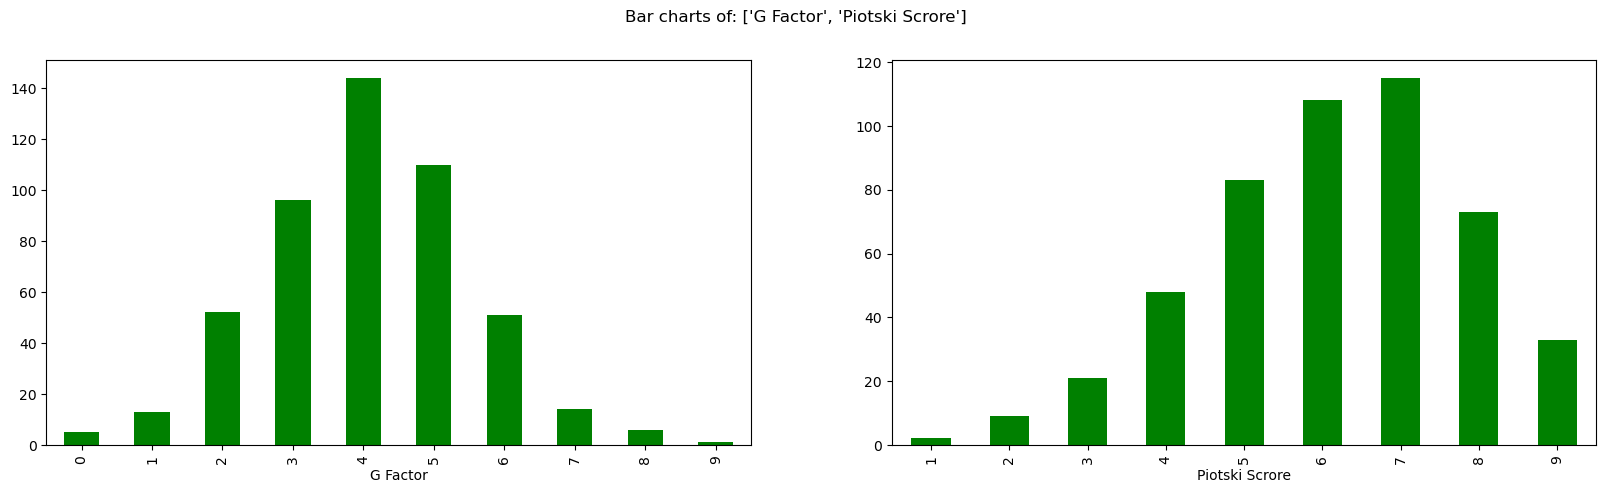

In [303]:
# FOR CATEGORICAL VARIABLES
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',color='green',ax=subPlot[plotNumber])

# Calling the Function
PlotBarCharts(inpData=SAMPLEDATA, colsToPlot=['G Factor', 'Piotski Scrore'])

## Treating Imbalance in categorical predictors
# bucketing

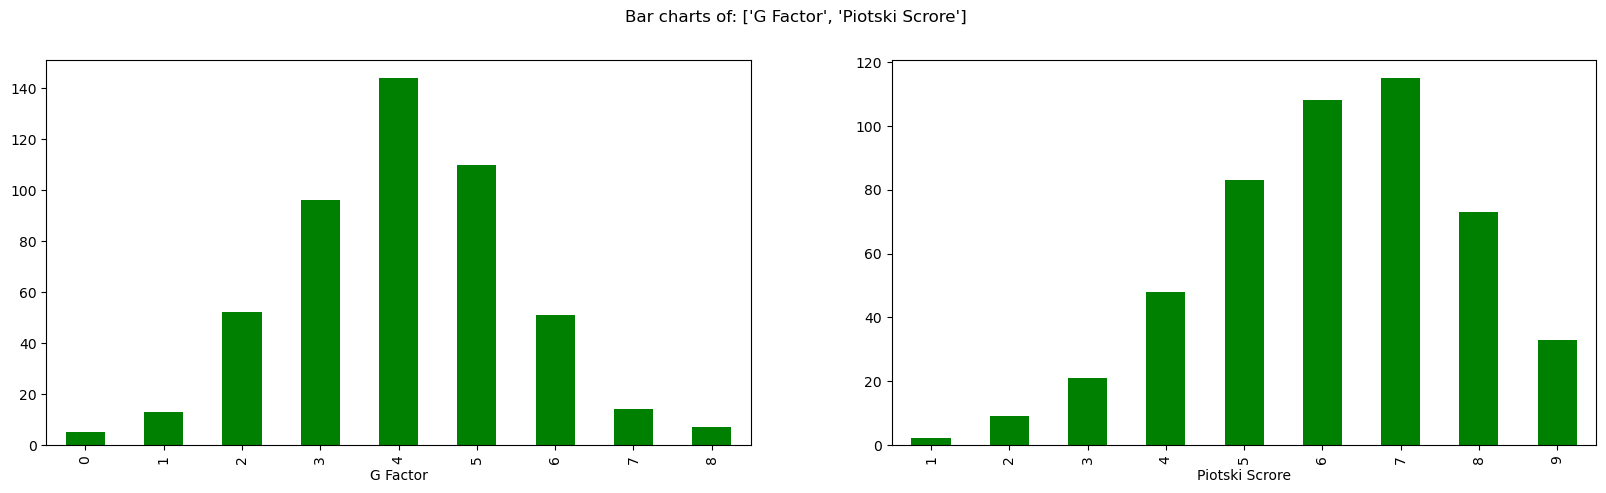

<Figure size 640x480 with 0 Axes>

In [304]:
# Grouping the SibSP values 3,4,5,8 in one single bucket as 3
SAMPLEDATA['G Factor'][SAMPLEDATA['G Factor']>=8]=8
PlotBarCharts(inpData=SAMPLEDATA, colsToPlot=['G Factor', 'Piotski Scrore'])

# exporting the image to the local disk
plt.show()
plt.savefig('Column Charts.png')

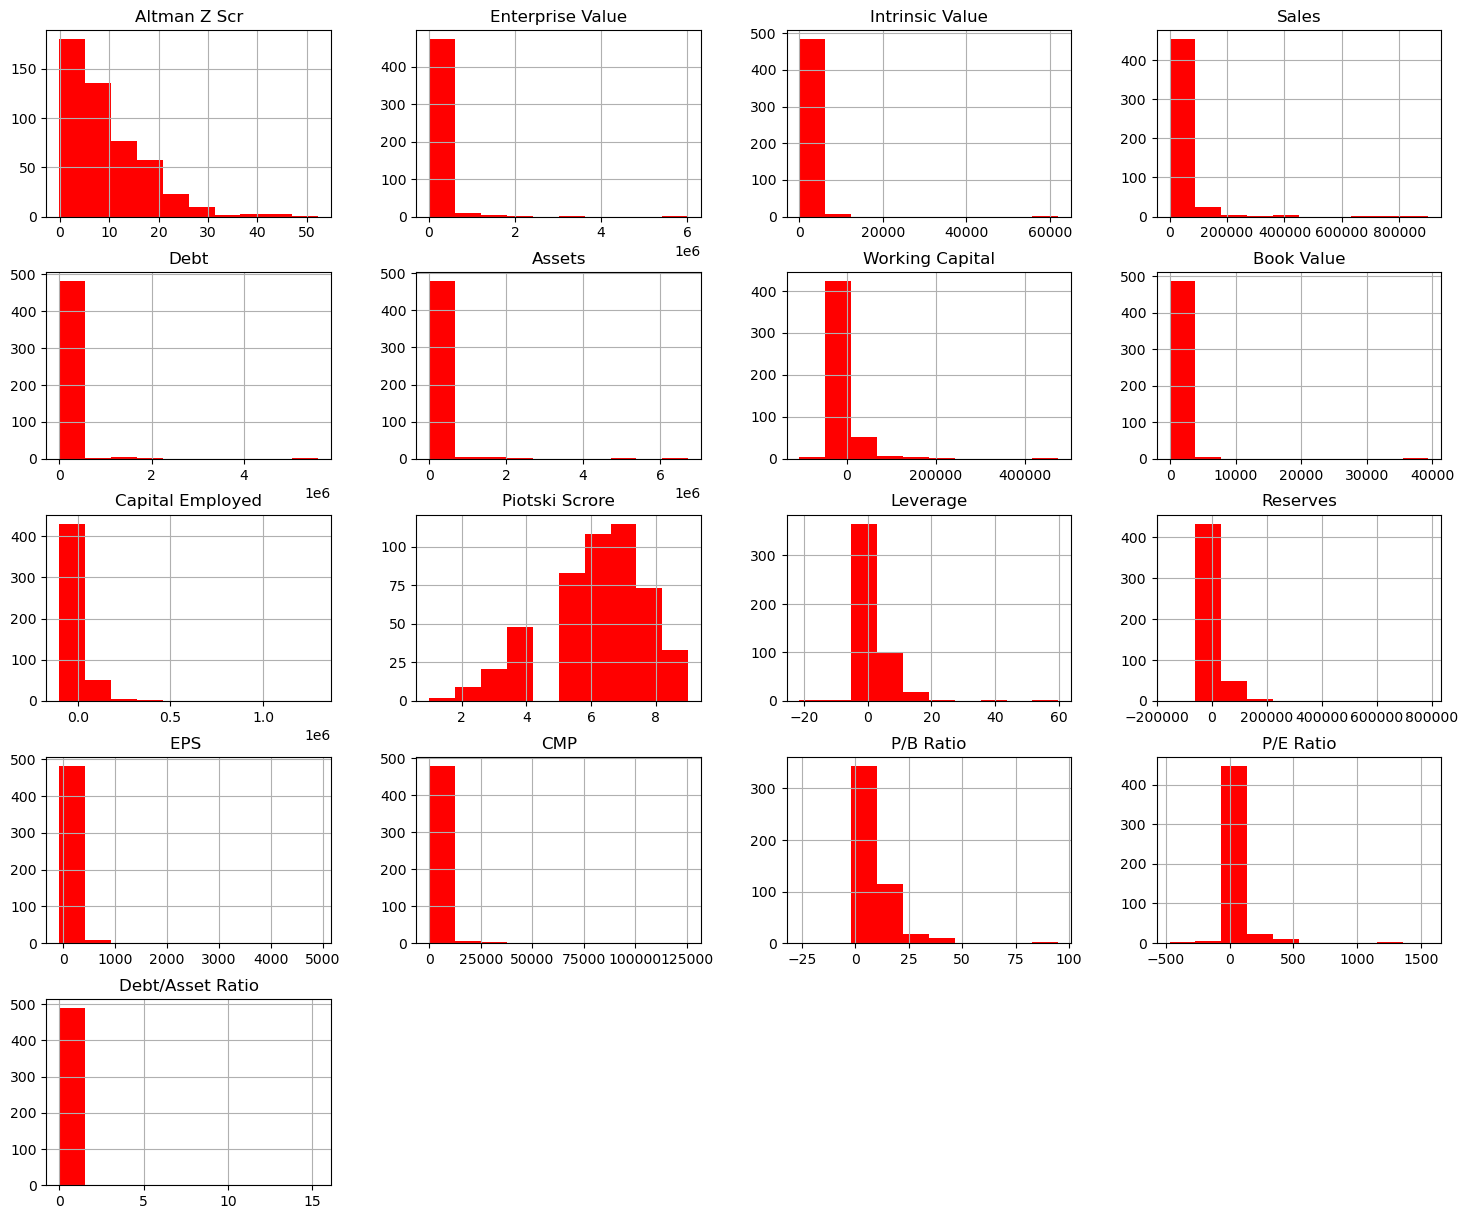

<Figure size 640x480 with 0 Axes>

In [240]:
# FOR CONTINIOUS VARIABLES
SAMPLEDATA.hist(['Altman Z Scr', 'Enterprise Value',
       'Intrinsic Value', 'Sales', 'Debt', 'Assets', 'Working Capital',
       'Book Value', 'Capital Employed', 'Piotski Scrore', 'Leverage',
       'Reserves', 'EPS ','CMP','P/B Ratio', 'P/E Ratio', 'Debt/Asset Ratio'], figsize=(18,15),color='red')

# exporting the image to the local disk
plt.show()
plt.savefig('Histogram Charts.png')

# Data Interpretation

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

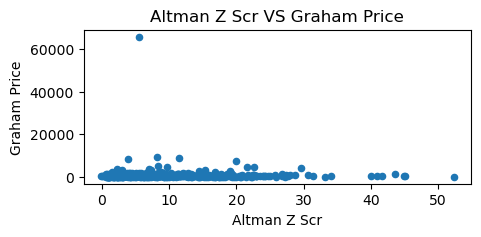

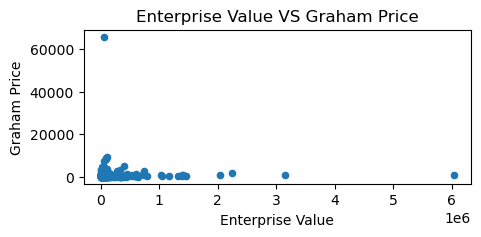

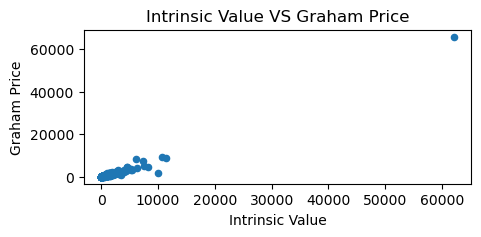

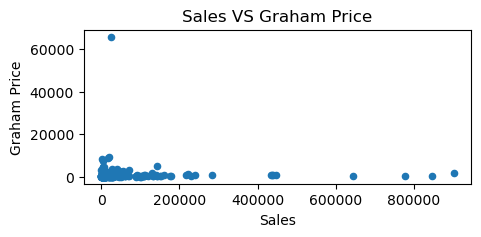

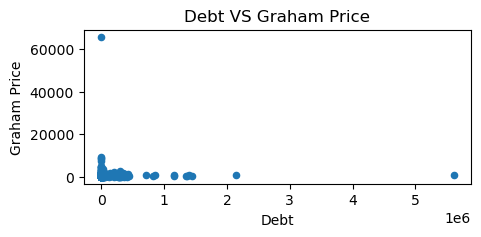

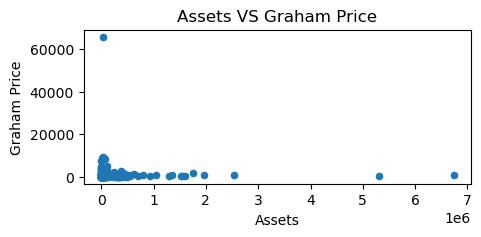

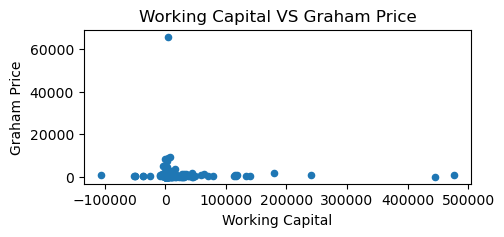

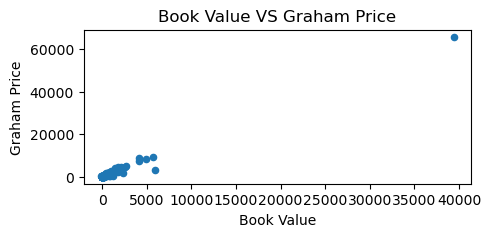

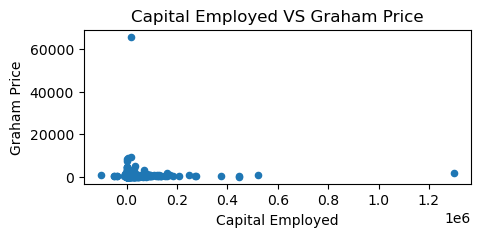

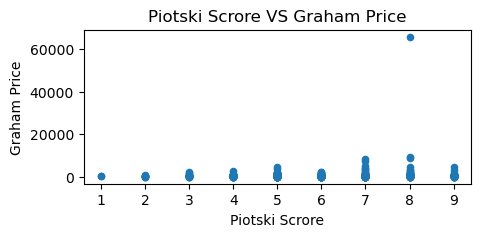

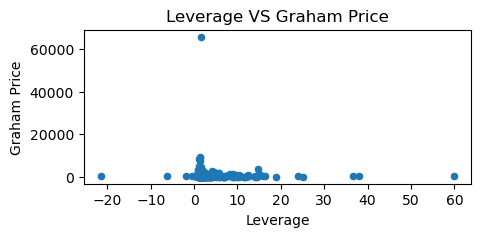

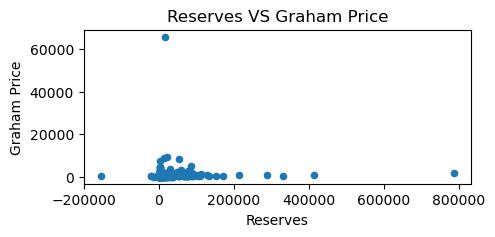

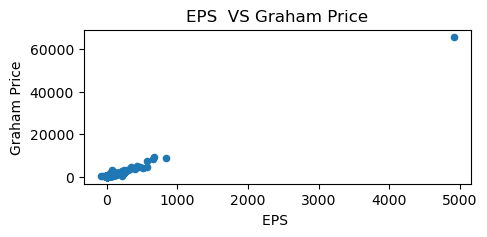

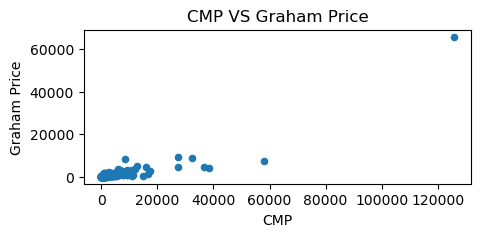

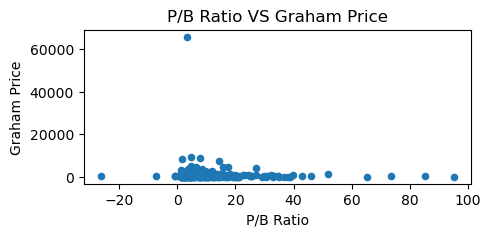

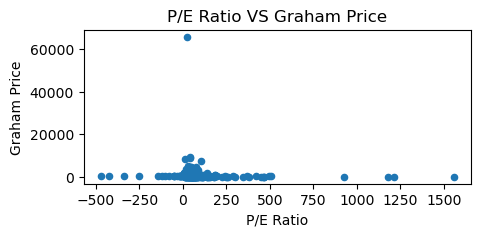

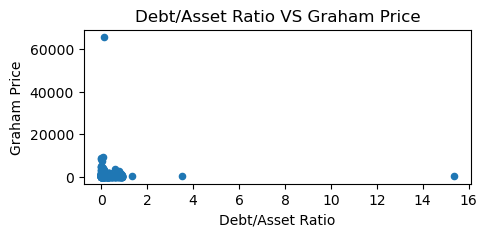

<Figure size 640x480 with 0 Axes>

In [305]:
ContinuousCols=['Altman Z Scr', 'Enterprise Value',
       'Intrinsic Value', 'Sales', 'Debt', 'Assets', 'Working Capital',
       'Book Value', 'Capital Employed', 'Piotski Scrore', 'Leverage',
       'Reserves', 'EPS ','CMP','P/B Ratio', 'P/E Ratio', 'Debt/Asset Ratio']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    SAMPLEDATA.plot.scatter(x=predictor, y='Graham Price', figsize=(5,2), title=predictor+" VS "+ 'Graham Price')

# exporting the image to the local disk
plt.show()
plt.savefig('Scatter Charts.png')

In [306]:
# Calculating correlation matrix
ContinuousCols1=['Altman Z Scr', 'Enterprise Value', 'Graham Price',
       'Intrinsic Value', 'Sales', 'Debt', 'Assets', 'Working Capital',
       'Book Value', 'Capital Employed', 'Piotski Scrore', 'Leverage',
       'Reserves', 'EPS ','CMP','P/B Ratio', 'P/E Ratio', 'Debt/Asset Ratio']

# Creating the correlation matrix
CorrelationData=SAMPLEDATA[ContinuousCols1].corr()
CorrelationData

Altman Z Scr  Enterprise Value  Graham Price  \
Altman Z Scr          1.000000         -0.165039     -0.009471   
Enterprise Value     -0.165039          1.000000      0.004696   
Graham Price         -0.009471          0.004696      1.000000   
Intrinsic Value       0.027966         -0.007375      0.980382   
Sales                -0.195400          0.521976      0.011877   
Debt                 -0.188466          0.925385     -0.006316   
Assets               -0.210652          0.850625     -0.003744   
Working Capital      -0.153819          0.780855     -0.002856   
Book Value           -0.032039          0.001807      0.991071   
Capital Employed     -0.188806          0.617925      0.004414   
Piotski Scrore        0.209494         -0.008633      0.087737   
Leverage             -0.300413          0.300189     -0.034560   
Reserves             -0.201324          0.739212      0.029174   
EPS                   0.021144          0.007117      0.992835   
CMP                   0.192536         -0.026495      0.885666   
P/B Ratio             0.747417         -0.084158     -0.040245   
P/E Ratio             0.186660         -0.064877     -0.041174   
Debt/Asset Ratio     -0.236878          0.107836     -0.029439   

                  Intrinsic Value     Sales      Debt    Assets  \
Altman Z Scr             0.027966 -0.195400 -0.188466 -0.210652   
Enterprise Value        -0.007375  0.521976  0.925385  0.850625   
Graham Price             0.980382  0.011877 -0.006316 -0.003744   
Intrinsic Value          1.000000 -0.002016 -0.020906 -0.016291   
Sales                   -0.002016  1.000000  0.325975  0.616481   
Debt                    -0.020906  0.325975  1.000000  0.830853   
Assets                  -0.016291  0.616481  0.830853  1.000000   
Working Capital         -0.015966  0.417195  0.759754  0.740823   
Book Value               0.962309  0.007918 -0.007346 -0.004670   
Capital Employed        -0.017500  0.742304  0.418531  0.515154   
Piotski Scrore           0.090975  0.063910 -0.030833 -0.018281   
Leverage                -0.047084  0.353175  0.296864  0.546630   
Reserves                 0.011539  0.758304  0.541479  0.614585   
EPS                      0.986480  0.017498 -0.007244 -0.002822   
CMP                      0.897893 -0.032229 -0.043569 -0.043267   
P/B Ratio               -0.019042 -0.119415 -0.116063 -0.115605   
P/E Ratio               -0.051000 -0.084616 -0.063107 -0.067653   
Debt/Asset Ratio        -0.042359  0.020912  0.130590  0.090012   

                  Working Capital  Book Value  Capital Employed  \
Altman Z Scr            -0.153819   -0.032039         -0.188806   
Enterprise Value         0.780855    0.001807          0.617925   
Graham Price            -0.002856    0.991071          0.004414   
Intrinsic Value         -0.015966    0.962309         -0.017500   
Sales                    0.417195    0.007918          0.742304   
Debt                     0.759754   -0.007346          0.418531   
Assets                   0.740823   -0.004670          0.515154   
Working Capital          1.000000   -0.002827          0.623422   
Book Value              -0.002827    1.000000          0.008434   
Capital Employed         0.623422    0.008434          1.000000   
Piotski Scrore           0.012126    0.084131          0.037259   
Leverage                 0.313583   -0.036606          0.140731   
Reserves                 0.578780    0.035394          0.879503   
EPS                     -0.002578    0.972274         -0.001478   
CMP                     -0.033259    0.861780         -0.036609   
P/B Ratio               -0.093079   -0.057157         -0.122228   
P/E Ratio               -0.050203   -0.029057         -0.064475   
Debt/Asset Ratio         0.086917   -0.034566          0.054965   

                  Piotski Scrore  Leverage  Reserves      EPS        CMP  \
Altman Z Scr            0.209494 -0.300413 -0.201324  0.021144  0.192536   
Enterprise Value       -0.008633  0.300189  0.739212  0.007117 

In [307]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Graham Price'][abs(CorrelationData['Graham Price']) > 0.5]

Graham Price       1.000000
Intrinsic Value    0.980382
Book Value         0.991071
EPS                0.992835
CMP                0.885666
Name: Graham Price, dtype: float64

In [308]:
abs(CorrelationData['Graham Price'])>0.5

Altman Z Scr        False
Enterprise Value    False
Graham Price         True
Intrinsic Value      True
Sales               False
Debt                False
Assets              False
Working Capital     False
Book Value           True
Capital Employed    False
Piotski Scrore      False
Leverage            False
Reserves            False
EPS                  True
CMP                  True
P/B Ratio           False
P/E Ratio           False
Debt/Asset Ratio    False
Name: Graham Price, dtype: bool

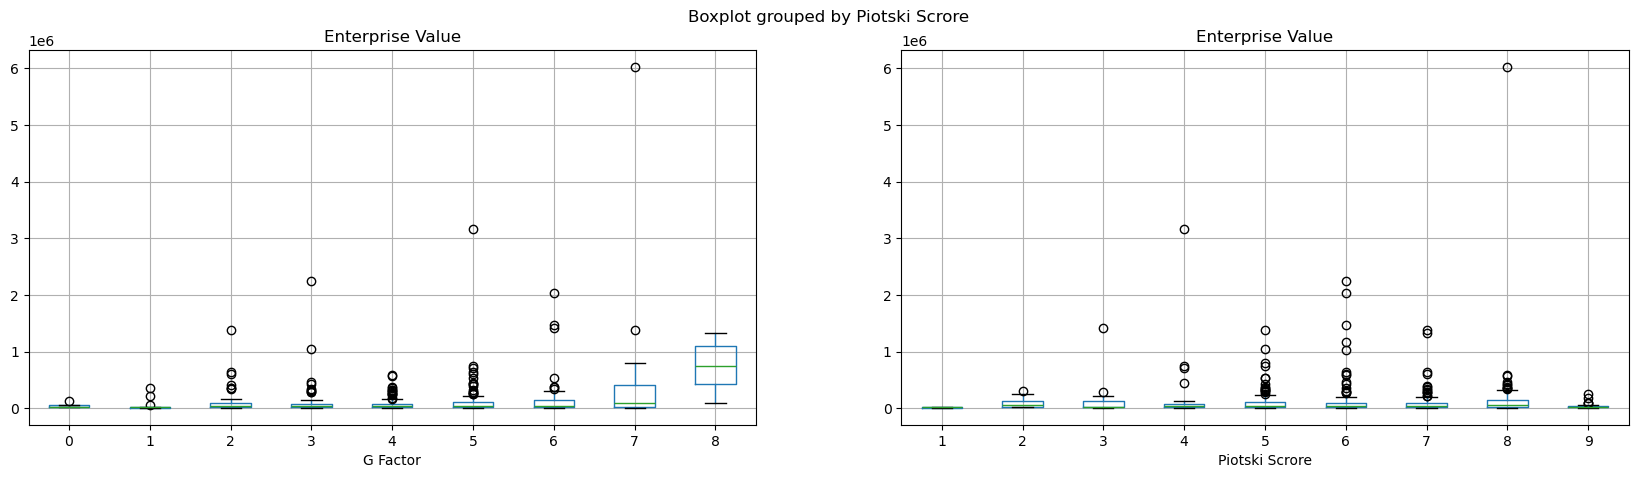

<Figure size 640x480 with 0 Axes>

In [309]:
# Box plots for Categorical Target Variable  and continuous predictors
CategoricalColsList=['G Factor', 'Piotski Scrore']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(20,5))

# Creating box plots for each continuous predictor against the Target Variable 
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    SAMPLEDATA.boxplot(column='Enterprise Value', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

# exporting the image to the local disk
plt.show()
plt.savefig('Box Charts.png')

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [310]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [311]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['G Factor', 'Piotski Scrore']
FunctionAnova(inpData=SAMPLEDATA, 
              TargetVariable='Graham Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

G Factor is NOT correlated with Graham Price | P-Value: 0.9766616482644288
Piotski Scrore is NOT correlated with Graham Price | P-Value: 0.1969286378331073


[]

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [312]:
SelectedColumns=['Intrinsic Value','Book Value','EPS ','CMP','Graham Price']

# Selecting final columns
DataForML=SAMPLEDATA[SelectedColumns]
DataForML.head()

Intrinsic Value  Book Value    EPS       CMP  Graham Price
0          1049.69     1172.80  102.90  2955.10       1647.85
1          1525.58      250.10  126.88  3832.05        845.00
2          1030.67      518.73   84.33  1596.90        992.07
3           226.82      145.04   13.20  1427.40        207.58
4           720.16      307.18   63.02  1105.65        659.99

In [313]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [250]:
# Reading a pickle file
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

Intrinsic Value  Book Value    EPS       CMP  Graham Price
0          1049.69     1172.80  102.90  2955.10       1647.85
1          1525.58      250.10  126.88  3832.05        845.00
2          1030.67      518.73   84.33  1596.90        992.07
3           226.82      145.04   13.20  1427.40        207.58
4           720.16      307.18   63.02  1105.65        659.99

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [314]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Graham Price']=SAMPLEDATA['Graham Price']

# Printing sample rows
DataForML_Numeric.head()

Intrinsic Value  Book Value    EPS       CMP  Graham Price
0          1049.69     1172.80  102.90  2955.10       1647.85
1          1525.58      250.10  126.88  3832.05        845.00
2          1030.67      518.73   84.33  1596.90        992.07
3           226.82      145.04   13.20  1427.40        207.58
4           720.16      307.18   63.02  1105.65        659.99

In [315]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Intrinsic Value', 'Book Value', 'EPS ', 'CMP', 'Graham Price'], dtype='object')

In [317]:
# Separate Target Variable and Predictor Variables
TargetVariable='Graham Price'
Predictors=['Intrinsic Value','Book Value','EPS ','CMP']

# Simple Linear Regression (only one predictor)
# Predictors=['']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False)
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names()

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(344, 4)
(344,)
(148, 4)
(148,)


In [318]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Graham Price']-TestingDataResults['PredictedGraham Price']))/TestingDataResults['Graham Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9868927916095883

##### Model Validation and Accuracy Calculations ##########
   Intrinsic Value  Book Value   EPS      CMP  Graham Price  \
0           440.28      122.17  24.97   482.6        262.00   
1           112.13      155.66   6.22   854.9        147.64   
2            76.97       22.34   5.45   309.6         52.34   
3           190.51       99.20  16.71  1582.8        193.15   
4           392.86      191.86  29.41   304.8        356.33   

   PredictedGraham Price  
0                  273.0  
1                  159.0  
2                   67.0  
3                  198.0  
4                  353.0  
   Graham Price  PredictedGraham Price        APE
0        262.00                  273.0   4.198473
1        147.64                  159.0   7.694392
2         52.34                   67.0  28.009171
3        193.15                  198.0   2.511002
4        356.33                  353.0   0.934527
Mean Accuracy on test data: 81.51556021175364
Medi

# Multiple Linear Regression

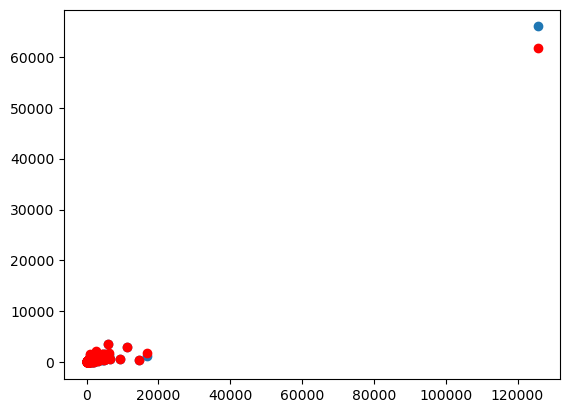

In [255]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['CMP'] , y=TestingDataResults['Graham Price'])
plt.scatter(TestingDataResults['CMP'] ,TestingDataResults['PredictedGraham Price'], color='red')

In [319]:
SelectedColumns=['Intrinsic Value','Book Value','EPS ','CMP']

In [320]:
# Looking at the coefficients for each column (M Value)
LREG.coef_

array([-1.65837521e-02,  6.62454033e-01,  7.49674060e+00, -1.50653784e-03])

In [258]:
# Looking at the intercept (C Value)
LREG.intercept_

12.845045730452739

In [321]:
 #SLR Equation
 #Graham Price=--1.5065(CMP)+12.845

# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.9727757198175022

##### Model Validation and Accuracy Calculations ##########
   Graham Price  PredictedGraham Price
0        262.00                  193.0
1        147.64                  193.0
2         52.34                  193.0
3        193.15                  193.0
4        356.33                  193.0
Mean Accuracy on test data: -17.563174402072136
Median Accuracy on test data: 69.59827752065358

Accuracy values for 10-fold Cross Validation:
 [  36.85165771  -54.63095327 -132.64286757 -102.73041319  -56.28892699
   11.4519011  -145.42540629  -44.01845778   -3.22924921  -61.2087352 ]

Final Average Accuracy of the model: -55.19


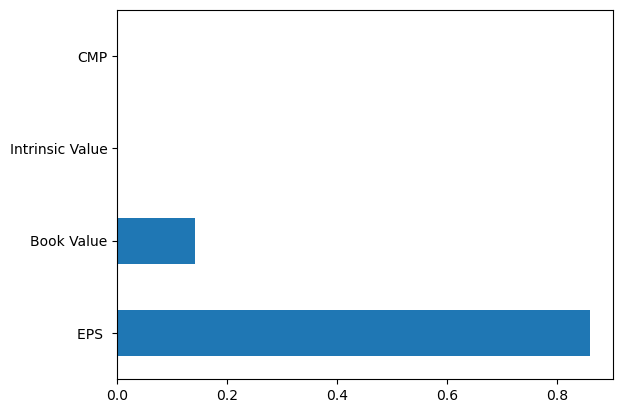

<Figure size 640x480 with 0 Axes>

In [322]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Graham Price']-TestingDataResults['PredictedGraham Price']))/TestingDataResults['Graham Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# exporting the image to the local disk
plt.show()
plt.savefig('Bar Charts.png')

In [261]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt / people with mac run on terminal
#pip install graphviz
# conda install graphviz
#pip install pydotplus

In [323]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\SOMNATH\anaconda3\Library\bin\\graphviz'

In [263]:
np.var(y_train)

1288575.1055535509

In [324]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1200,height=1500)
# Double click on the graph to zoom in


# exporting the image to the local disk
plt.show()
plt.savefig('Decision Tree.png')

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="EPS  <= 285.32\nsquared_error = 1288575.106\nsamples = 344\nvalue = 645.815"] ;
1 [label="EPS  <= 73.565\nsquared_error = 279590.939\nsamples = 333\nvalue = 475.688"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="EPS  <= 35.765\nsquared_error = 44228.491\nsamples = 276\nvalue = 283.483"] ;
1 -> 2 ;
3 [label="squared_error = 12369.222\nsamples = 214\nvalue = 193.263"] ;
2 -> 3 ;
4 [label="squared_error = 29126.402\nsamples = 62\nvalue = 594.888"] ;
2 -> 4 ;
5 [label="Book Value <= 849.41\nsquared_error = 374195.363\nsamples = 57\nvalue = 1406.367"] ;
1 -> 5 ;
6 [label="squared_error = 85239.483\nsamples = 45\nvalue = 1145.784"] ;
5 -> 6 ;
7 [label="squared_error = 248249.524\nsamples = 12\nvalue = 2383.553"] ;
5 -> 7 ;
8 [label="Book Value <= 3401.245\nsquared_error = 4432478.786\nsamples = 11\nvalue = 5796.02"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabe

<Figure size 640x480 with 0 Axes>

In [269]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')

<Figure size 640x480 with 0 Axes>

# Exploratory Data Analysis 

In [285]:
SelectGraham=['Name','Graham Price','CMP']
Graham=SAMPLEDATA[SelectGraham]
top_n = Graham.nlargest(10, 'Graham Price')
print(top_n)


                 Name  Graham Price        CMP
169               MRF      65943.02  125580.70
96       Shree Cement       9258.66   27538.00
98              Bosch       8815.32   32327.80
100    Bajaj Holdings       8462.43    8302.85
172    Honeywell Auto       7214.10   57926.80
12      Maruti Suzuki       5127.55   12845.20
200          3M India       4747.23   36489.25
155      Abbott India       4705.37   27464.90
365  Lak. Mach. Works       4462.83   16129.20
194   Page Industries       4054.48   38512.70


In [291]:
Selectstock=['Name','Graham Price','CMP','G Factor','Book Value']
Stock=SAMPLEDATA[Selectstock]

UndervaluedStock = Stock[Stock['Graham Price'] > Stock['CMP']]
print("Filtered rows where Graham Price> Market Value :")
print(UndervaluedStock)

Filtered rows where Graham Price> Market Value :
                 Name  Graham Price      CMP  G Factor  Book Value
5      St Bk of India       886.760   839.20         7      464.94
21            O N G C       485.670   275.40         7      267.94
38            I O C L       293.870   170.36         6      129.89
39         Tata Steel       299.955   183.15         4       73.73
48   Power Fin.Corpn.       642.610   510.05         8      306.50
56     Hindalco Inds.       693.010   683.60         5      472.34
58     Bank of Baroda       407.280   286.25         7      203.15
63   Punjab Natl.Bank       136.590   128.94         6      100.25
64            REC Ltd       564.200   532.65         8      263.37
65            B P C L       985.570   626.65         7      348.67
81      Vodafone Idea       299.955    16.73         2      -20.78
82     Union Bank (I)       216.540   147.55         8      115.30
84        Canara Bank       196.200   120.81         8      101.57
100    Bajaj 